<a href="https://colab.research.google.com/github/1Light/Experimental-physics-lab/blob/main/Four%20Probe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Four Probe Method





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd

print("imported")

imported


In [2]:
df = pd.read_excel(r'/home/ashwin/Git/general-physics-lab/foreprobe.xlsx')
print(df)

      T    V_H   V_C   V_avg
0    30  99.70  99.7  99.700
1    35  76.20  76.2  76.200
2    40  63.90  78.6  71.250
3    45  51.10  64.3  57.700
4    50  42.60  52.9  47.750
5    55  36.30  43.6  39.950
6    60  31.10  36.1  33.600
7    65  26.60  30.3  28.450
8    70  23.10  25.5  24.300
9    75  19.80  21.7  20.750
10   80  17.10  18.7  17.900
11   85  14.80  15.9  15.350
12   90  12.90  13.7  13.300
13   95  11.10  11.8  11.450
14  100   9.70  10.3  10.000
15  105   8.45   9.1   8.775
16  110   7.20   7.9   7.550
17  115   6.30   6.9   6.600
18  120   5.50   6.1   5.800
19  125   4.70   5.2   4.950


In [21]:
T=df['T'].to_numpy()
V=df['V_avg'].to_numpy()

T_all=T[:]+273
V_all=V[:]*0.1*0.001

T=T_all[:]
V=V_all[:]



In [22]:
print(T)
print(V)

[303 308 313 318 323 328 333 338 343 348 353 358 363 368 373 378 383 388
 393 398]
[0.00997   0.00762   0.007125  0.00577   0.004775  0.003995  0.00336
 0.002845  0.00243   0.002075  0.00179   0.001535  0.00133   0.001145
 0.001     0.0008775 0.000755  0.00066   0.00058   0.000495 ]


Doing Thickness effect correction for Non Condictive bottom  0.1783321018264404
Doing Lateral size effect correction  0.8057965136567927
    Serial no   Voltage (V)   Temperature (K)  rho (Ohms.m)   rho (Ohms.cm)  \
0            1      0.009970               303     9.00e-03   0.9 +/- 0.002   
1            2      0.007620               308     6.88e-03  0.69 +/- 0.001   
2            3      0.007125               313     6.43e-03  0.64 +/- 0.001   
3            4      0.005770               318     5.21e-03  0.52 +/- 0.001   
4            5      0.004775               323     4.31e-03    0.43 +/- 0.0   
5            6      0.003995               328     3.61e-03    0.36 +/- 0.0   
6            7      0.003360               333     3.03e-03     0.3 +/- 0.0   
7            8      0.002845               338     2.57e-03    0.26 +/- 0.0   
8            9      0.002430               343     2.19e-03    0.22 +/- 0.0   
9           10      0.002075               348     1.87e-03    0.19 +/- 0

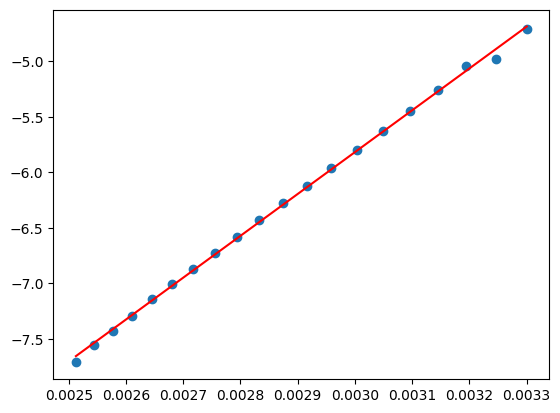

In [33]:
#T = [298.0, 308.0, 318.0, 328.0, 338.0, 348.0, 358.0, 368.0, 378.0, 388.0, 398.0, 408.0, 418.0, 428.0, 438.0] #in Kelvin
#V = [0.698, 0.662, 0.574, 0.46, 0.35, 0.261, 0.192, 0.142, 0.106, 0.081, 0.061, 0.048, 0.037, 0.03, 0.024]  #in Volts
I = 2.00 #mA

delta_V = 0.01 #V least count
delta_I = 0.1 #mA least count


S = 2.00 #mm
W = 0.50 #mm
t = 0.50 #mm

Length = 1.2 #cm
Breadth = 0.9 #cm

is_Condictive_bottom = False

###
'''
 Do not edit Consant below 
'''
###

Length = Length * pow(10,-2) #M
Breadth = Breadth * pow(10,-2) #M

k = 8.6E-5

I = I * pow(10,-3) #A
delta_I = 0.01 * pow(10,-3)
S = S * pow(10,-3)#M
W = W * pow(10,-3) #M
t = t * pow(10,-3)  #M


G7 = 2 * np.log(2) * S / t 

def rho_0(V, I):
    #print ((V / I ) * 2 * np.pi * S)
    return (V / I ) * 2 * np.pi * S

def rho(V, I):
  return rho_0( V , I ) * F_correction

def F1():
    t_S = t/S
    if (is_Condictive_bottom):
        correction = t_S /( 2 * np.log(np.cosh(t_S) / np.cosh(t_S/2)))
        print("Doing Thickness effect correction for Condictive bottom ",correction)
    else:
        correction = t_S /( 2* np.log(np.sinh(t_S) / np.sinh(t_S/2)))
        print("Doing Thickness effect correction for Non Condictive bottom ",correction)
    return correction
 
def F0():
    t_S = t/S
    correction = t_S /( 2* np.log(2) )
    print("Doing Thickness effect correction for Non Condictive bottom ",correction)
    return correction
 
    
def F2() :
    d_S = Length / S
    if (Length >= 40* S):
        correction = 1
    else:
        correction = np.log(2) / ( np.log(2) + np.log( (d_S**2 + 3)/(d_S**2 - 3) ))
        print("Doing Lateral size effect correction ",correction)
    return correction
                                     
def F():
    return F1()*F2()

def DelRhoFn(rho_i , V  ):
    const =  2 * np.pi * S * F_correction 
    val = const * rho_i * np.sqrt( pow((V/delta_V),2) + pow((delta_I / I ),2) )
    return val

F_correction =F()

Rho = []
T_1 = [] #10^-3
log_Rho = [] 
srNo = []
RhoTable = []
delta_Rho = []

for i in range(len(T)):
  srNo.append(i+1)
  rho_i = rho(V[i], I)  
  Rho.append( "{:.2e}".format(rho_i)  )

  delta_Rho.append(DelRhoFn(rho_i,V[i]))
  RhoTable.append( str(round(rho_i * 100 , 2)) + " +/- "+ str(round( DelRhoFn(rho_i,V[i])*100 ,3))) 


  T_1.append( 1 / T[i] )
  log_Rho.append ( np.log( rho_i ))

 

table = { 'Serial no ' :  srNo,
         'Voltage (V) ': V,
         'Temperature (K) ': T,
         'rho (Ohms.m)': Rho,
         
         'rho (Ohms.cm)': RhoTable,
         #'Delta rho (Ohms.m)': delta_Rho,
         'T * 10^-3': np.array(T_1) * pow(10,3),
         'log_Rho': log_Rho }

# log to base e is used and the Temp in Table is in terms of 10^-3

dataframe = pd.DataFrame(table)
print(dataframe)

result = linregress(T_1, log_Rho)

m = result.slope
b = result.intercept

delta_m = result.stderr 
#delta_b = result.intercept_stderr 


plt.scatter(T_1, log_Rho)
plt.plot(T_1, np.array(T_1) * m + b , color="red")  
print("Energy Band Gap in eV = " , round(2*8.6*pow(10,-5) * m ,2))

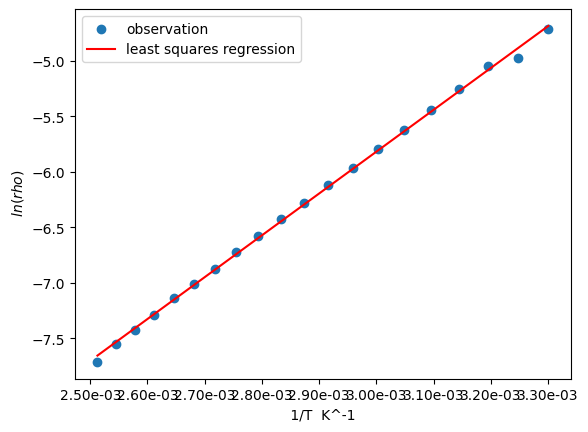

Energy Band Gap in eV =  0.65


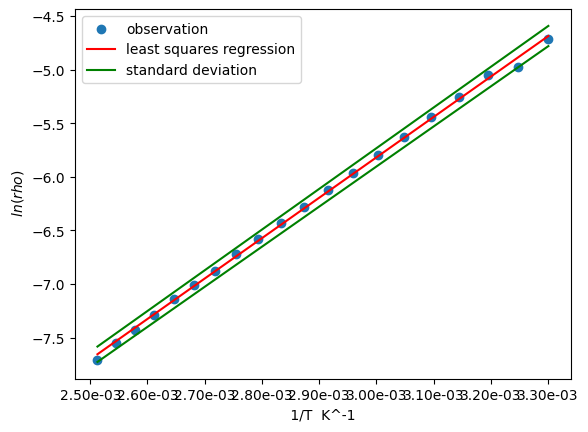

Energy Band Gap = 0.65 +/- 0.0049 eV


In [34]:
import matplotlib.ticker as mtick

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(T_1, log_Rho,label = 'observation')
ax.plot(T_1, np.array(T_1) * m + b , color="red",label = 'least squares regression')
#ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))

ax.legend()
plt.xlabel(r" 1/T  K^-1 ")
plt.ylabel(r" $ln(rho)$")

plt.show()
print("Energy Band Gap in eV = " , round(2*8.6*pow(10,-5) * m ,2))


fig2 = plt.figure()

ay = fig2.add_subplot(111)


ay.scatter(T_1, log_Rho,label = 'observation')

ay.plot(T_1, np.array(T_1) * m + b , color="red",label = 'least squares regression')
ay.plot(T_1, np.array(T_1) * (m +delta_m ) + b , color="green",label = 'standard deviation')
ay.plot(T_1, np.array(T_1) * (m-delta_m) + b , color="green")


#ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ay.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))

ay.legend()
plt.xlabel(r" 1/T  K^-1 ")
plt.ylabel(r" $ln(rho)$")

plt.show()
print("Energy Band Gap = {0} +/- {1} eV".format( round(2*8.6*pow(10,-5) * m ,2), round(2*8.6*pow(10,-5) * delta_m ,4) ))

fig2.savefig("FigSlopeUnc.png")

In [35]:
Rho = []
T_1 = [] #10^-3
log_Rho = [] 
srNo = []
RhoTable = []
delta_Rho = []
log_Rho_Table = []
for i in range(len(T)):
  srNo.append(i+1)
  rho_i = rho(V[i], I)  
  Rho.append( rho_i )
  delta_Rho.append(DelRhoFn(rho_i,V[i]))
  RhoTable.append( str(round(rho_i * 100 , 2)) + " +/- "+ str(round( DelRhoFn(rho_i,V[i])*100 ,3))) 
  T_1.append( 1 / T[i] )
  log_Rho.append ( np.log( rho_i ))
  log_Rho_Table.append(str(round(np.log( rho_i ),3) )+ " +/- "+str(round(DelRhoFn(rho_i,V[i]) / rho(V[i], I) ,3 ) ) ) 


 

table = { 'Serial no ' :  srNo,
         'Voltage (V) ': V,
         'Temperature (K) ': T,
         'rho (Ohms.cm)': RhoTable,
         #'Delta rho (Ohms.m)': delta_Rho,
         'T * 10^-3': np.array(T_1) * pow(10,3),
         'log_Rho (rho in ohm.m )': log_Rho_Table }

# log to base e is used and the Temp in Table is in terms of 10^-3

dataframe = pd.DataFrame(table)
print(dataframe)

    Serial no   Voltage (V)   Temperature (K)    rho (Ohms.cm)  T * 10^-3  \
0            1      0.009970               303   0.9 +/- 0.002   3.300330   
1            2      0.007620               308  0.69 +/- 0.001   3.246753   
2            3      0.007125               313  0.64 +/- 0.001   3.194888   
3            4      0.005770               318  0.52 +/- 0.001   3.144654   
4            5      0.004775               323    0.43 +/- 0.0   3.095975   
5            6      0.003995               328    0.36 +/- 0.0   3.048780   
6            7      0.003360               333     0.3 +/- 0.0   3.003003   
7            8      0.002845               338    0.26 +/- 0.0   2.958580   
8            9      0.002430               343    0.22 +/- 0.0   2.915452   
9           10      0.002075               348    0.19 +/- 0.0   2.873563   
10          11      0.001790               353    0.16 +/- 0.0   2.832861   
11          12      0.001535               358    0.14 +/- 0.0   2.793296   

In [36]:
dataframe.to_excel("data_uncertinity.xlsx") 


In [27]:
fig2.savefig("FigSlopeUnc.png")

In [28]:
V

array([0.00997  , 0.00762  , 0.007125 , 0.00577  , 0.004775 , 0.003995 ,
       0.00336  , 0.002845 , 0.00243  , 0.002075 , 0.00179  , 0.001535 ,
       0.00133  , 0.001145 , 0.001    , 0.0008775, 0.000755 , 0.00066  ,
       0.00058  , 0.000495 ])

In [29]:
T

array([303, 308, 313, 318, 323, 328, 333, 338, 343, 348, 353, 358, 363,
       368, 373, 378, 383, 388, 393, 398])

In [30]:
V

array([0.00997  , 0.00762  , 0.007125 , 0.00577  , 0.004775 , 0.003995 ,
       0.00336  , 0.002845 , 0.00243  , 0.002075 , 0.00179  , 0.001535 ,
       0.00133  , 0.001145 , 0.001    , 0.0008775, 0.000755 , 0.00066  ,
       0.00058  , 0.000495 ])

In [31]:
273+40


313

In [32]:
1/303

0.0033003300330033004